# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#disable scientific notation for visual clarity
pd.options.display.float_format = '{:.2f}'.format

#disable warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
df = pd.read_csv('foodhub_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:
    The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by 
    a customer.

# **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
df.shape

(1898, 9)

#### Observations:
    There are 9 columns and 1898 rows in the data.

In [4]:
print('\U0001f600')

😀


# **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
    There are 4 int64 columns, 4 objects, and one float64. A slight majority of the columns are numerical.

In [6]:
print('\U0001f600')

😀


# **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [7]:
for entry in df:
    if df[entry].dtype=='O':
        df[entry]=df[entry].astype('category')
df['rating']=df['rating'].astype('O')          #keeping rating as an object type as instructed.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
    The memory usage is down from about 133kb to 102.7kb. Saved a lot of space!

In [8]:
print('\U0001f600')

😀


# **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
pd.DataFrame(df['food_preparation_time'].describe())

#we are looking solely at 'food_preparation_time'.

,food_preparation_time
count,1898.00
mean,27.37
std,4.63
min,20.00
25%,23.00
50%,27.00
75%,31.00
max,35.00


#### Observations:
    Mean food prep time: 27.4 minutes
    Minimum food prep:   20.0 minutes
    Max food prep time:  35.0 minutes
    Wow, these places are slow as heck.

In [10]:
print('\U0001f620')

😠


# **Question 5:** How many orders are not rated? [1 mark]

In [11]:
#check a quick sample to see what a 'not rated' entry in 'rating' looks like
df.sample(7)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
198,1477290,361509,Shake Shack,American,19.35,Weekday,Not given,35,33
43,1477728,107909,Cafeteria,American,16.44,Weekend,Not given,33,22
940,1477668,160957,Han Dynasty,Chinese,22.31,Weekend,5,29,15
650,1477315,176622,Cafe Mogador,Middle Eastern,15.91,Weekend,5,32,15
487,1478380,110091,The Meatball Shop,Italian,9.41,Weekday,5,30,32
392,1476580,331143,Waverly Diner,American,6.84,Weekend,Not given,24,18
372,1476941,127149,Sarabeth's East,American,5.72,Weekend,Not given,33,26


In [12]:
#It's 'Not given'.
x=0
for entry in df['rating']:
    if entry=='Not given':
        x=x+1
print('Number of "Not given" ratings: ',x)
del x

Number of "Not given" ratings:  736


#### Observations:
    There are 736 entries in 'rating' that are not rated.

In [13]:
print('\U0001f600')

😀


----

### Exploratory Data Analysis (EDA)

# Univariate Analysis!!!

# **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

## I will be going through this section one column at a time, with each column clearly marked for reference.

In [1]:
#I will also be using that histogram_boxplot, slightly tweaked to my liking, from the class of 2-19-22

def histobox(data, feature, figsize=(15, 5), kde=False, bins=73):
    
#I used 73 bins by default because 1898 is divisible by it, evenly split bins. This will usually be modified though.

    HBP, (box,hist) = plt.subplots(
        nrows=2,
        sharex=True, #sharex and sharey just means the x and y axis won't show up for both, only one (usually bottom or left)
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )
    sns.boxplot(
        data=data, x=feature, ax=box, showmeans=True, color="orange"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=hist, bins=bins, palette="mako" #i like mako
    )
    hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

# order_id Univariate Analysis!!!

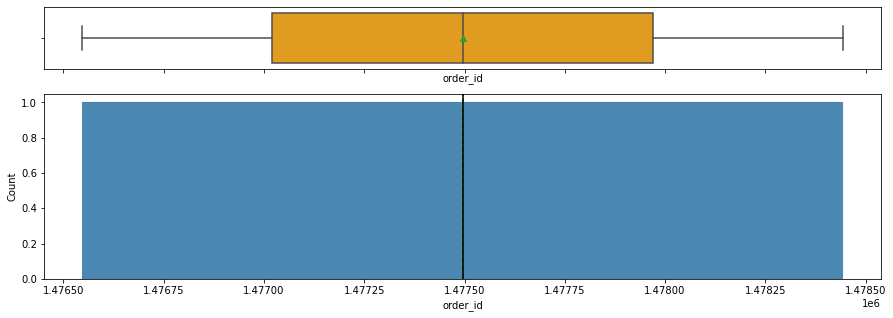

In [15]:
histobox(df,'order_id',bins=1898); #using all bins to show there are no gaps in order_id

#### Observations:
    Not much here, it's just the order id. It's interesting that there does not seem to be any gaps in the histogram though,
    all order id's between 1476547 and 1478444 are likely included in the data set.

# customer_id Univariate Analysis!!!

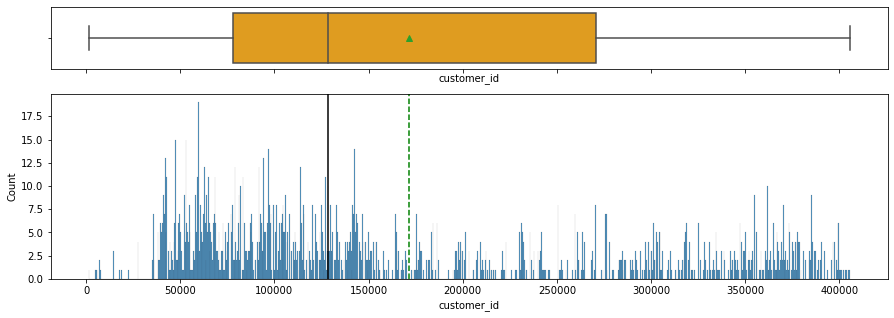

In [16]:
histobox(df,'customer_id',bins=949); #using half bins because it loads faster and visually looks very similar

## I find it interesting there are so many orders for individual customer id's.

In [17]:
#quick unique value count using len

len(df['customer_id'].value_counts())

1200

#### Observations:
    There are 1200 total unique order IDs, but 1898 entries for it. Some customer IDs are ordering upwards of 10+
    times, many customers have only ever ordered ONCE. Checking value_counts() shows no customer_id's with 0 orders exist.

In [18]:
x=0
for entry in df['customer_id'].value_counts():
    if entry ==0:
        x=x+1
print('There are',x,'customer_id entries with zero orders.')
del x

There are 0 customer_id entries with zero orders.


#### Observations cont'd:
    Let's dig deeper. How many of the top customers make up 50% of FoodHub's orders?

In [19]:
A=pd.DataFrame(df['customer_id'].value_counts()).reset_index()
x=0
customercounter=0
while x<949:
    x=x+A['customer_id'][customercounter]
    customercounter=customercounter+1
print(customercounter,'customers make up {} of the orders'.format((x/1898*100).round(2).astype('str')+'%'),"\n")
print("That is about {}% of the customers.".format(round(customercounter/1200*100,2)))
del customercounter
del x

334 customers make up 50.05% of the orders 

That is about 27.83% of the customers.


#### Observations final:
    Around 27% of the customers buy half of the food.
    
    The remaining 866 customers ordered ~948 times from FoodHub, meaning beyond the top 27% of customers, most
    people only place one or two orders. That means roughly half of all FoodHub orders are from repeat customers, and 
    half are from people that only tried it once or twice.

# restaurant_name Univariate Analysis!!!

In [20]:
#making a temporary dataframe so I don't have to graph all 178 restaurants.
#it includes only the head(5) and tail(5) of the data. This is to show the top restaurants as well as the
#trend of restaurants only having one order, a trend which lasts for the bottom 50 restaurants.

Restaurant= df['restaurant_name'].value_counts().reset_index()
Restaurant.columns=(['restaurantname','orders'])
Restaurant=pd.concat([Restaurant.head(),Restaurant.tail()],axis=0)
Restaurant['restaurantname']=Restaurant['restaurantname'].cat.remove_unused_categories()

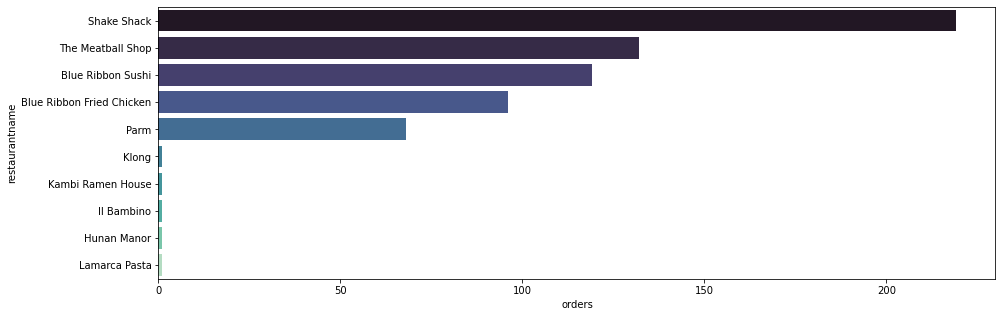

In [21]:
sns.barplot(data=Restaurant,x='orders',y='restaurantname',order=Restaurant['restaurantname'],palette='mako')
plt.gcf().set_size_inches(15,5)

#### Observations:
    As previously stated, the above graph is effectively a countplot but only including the head and tail of the data
    (so the graph isn't 10 pages long).
    
    A very large amount of restaurants (50) only have one order.
    Shake Shack, The Meatball Shop, and Blue Ribbon all have a massive lead in order numbers.
    
    Restaurants with one order analysis continued below.

In [22]:
A=pd.DataFrame(df['restaurant_name'].value_counts()).reset_index()
A.columns=['ressy','numby']
B=A.sort_values('numby',ascending=True)
B.head(10)

#as you can see, many restaurants only have one order. there are 50 in total (see last code)

,ressy,numby
177,Lamarca Pasta,1
149,Chola Eclectic Indian Cuisine,1
148,Chote Nawab,1
147,Cipriani Le Specialita,1
146,Coppola's East,1
145,Crema Restaurante,1
144,Dig Inn Seasonal Market,1
143,Dos Caminos Soho,1
142,Emporio,1
141,Frank Restaurant,1


In [23]:
x=0
for entry in B['numby']:
    if entry ==1:
        x=x+1
print('There are',x,'restaurants with only 1 order.')

There are 50 restaurants with only 1 order.


In [24]:
del A
del B
del x
del Restaurant

# cuisine_type Univariate Analysis!!!

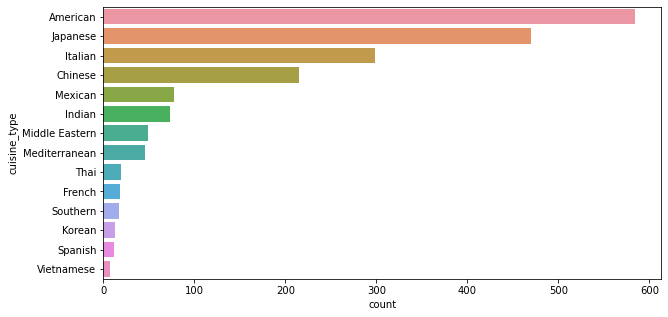

In [25]:
sns.countplot(data=df,y='cuisine_type',order=df['cuisine_type'].value_counts().index)
plt.gcf().set_size_inches(10,5)

#### Observations:
    American, Japanese, Italian, and Chinese all top the chart. 
    Vietnamese, Spanish, Korean, French, and Thai are all fairly low.
    
    Similar distribution to restaurant_name, but with only 14 entries rather than 178.
    Checking the meta data of cuisine_type shows there are zero unused categories.

In [26]:
df['cuisine_type']

0              Korean
1            Japanese
2             Mexican
3            American
4            American
            ...      
1893          Mexican
1894         American
1895         Japanese
1896    Mediterranean
1897         Japanese
Name: cuisine_type, Length: 1898, dtype: category
Categories (14, object): ['American', 'Chinese', 'French', 'Indian', ..., 'Southern', 'Spanish', 'Thai', 'Vietnamese']

# cost_of_the_order Univariate Analysis!!!

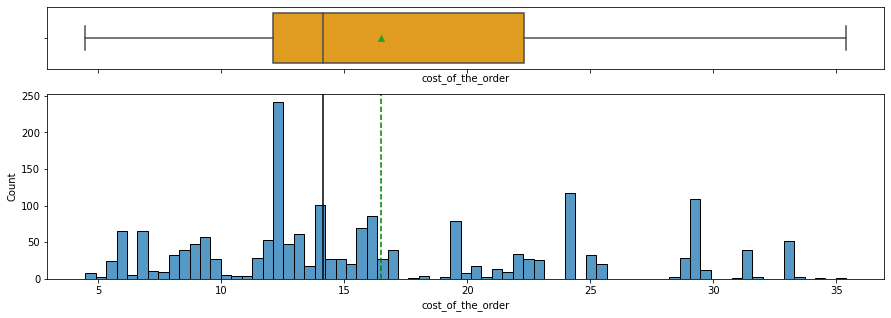

In [27]:
histobox(df,'cost_of_the_order')

In [28]:
df['cost_of_the_order'].value_counts()

12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61      1
29.59     1
Name: cost_of_the_order, Length: 312, dtype: int64

In [29]:
df['cost_of_the_order'].mean()

16.498851422550082

#### Observations: 
    I would say this is the first numerical data column that can truly be analyzed with the histogram/boxplot.
    
    The mean is above the median, so the data is right-skewed. More orders are around 12 dollars than any other cost, but 
    the mean cost of an order is 16.50. A small group of high cost orders are above 25 dollars, which is partially causing
    the skew.
    

# day_of_the_week Univariate Analysis!!!

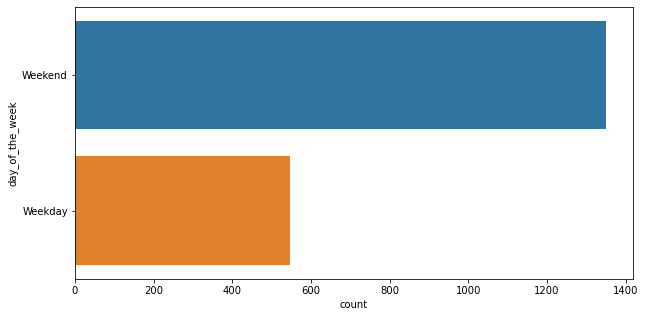

In [30]:
sns.countplot(data=df,y='day_of_the_week',order=df['day_of_the_week'].value_counts().index)
plt.gcf().set_size_inches(10,5)

In [31]:
A=df['day_of_the_week'].value_counts().reset_index()
A.columns=['day_of_the_week','orders']
print('Orders per day on the weekend:',A['orders'][0]/2)
print('Orders per day on the weekdays:',A['orders'][1]/5)
del A

Orders per day on the weekend: 675.5
Orders per day on the weekdays: 109.4


#### Observations:
    The weekends are much busier than the weekdays, especially considering there are 5 weekdays and 2 weekend days / week.
    There are around 675 orders on each weekend day, and 109 orders on each weekday.

# rating Univariate Analysis!!!

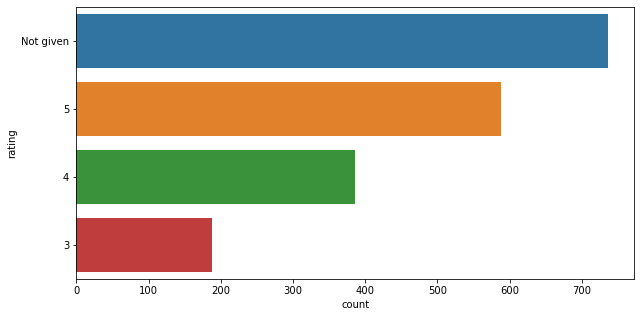

In [32]:
sns.countplot(data=df,y='rating',order=df['rating'].value_counts().index)
plt.gcf().set_size_inches(10,5)

#### Observations: 
    The highest value in the ratings column is Not given. This indicates that many customers don't take the time to 
    rate their orders.
    
    This could be improved by providing an incentive to rate orders; one example is a points system
    with rewards, in which leaving reviews provides additional points.
    
    This would allow a much more accurate look at
    the true ratings of each restaurant, food type, etc. which would allow for better targeted advertising.

# food_preparation_time Univariate Analysis!!!

In [33]:
len(df['food_preparation_time'].value_counts())

#finding the unique values in food_prep_time to accurately give bin counts.

16

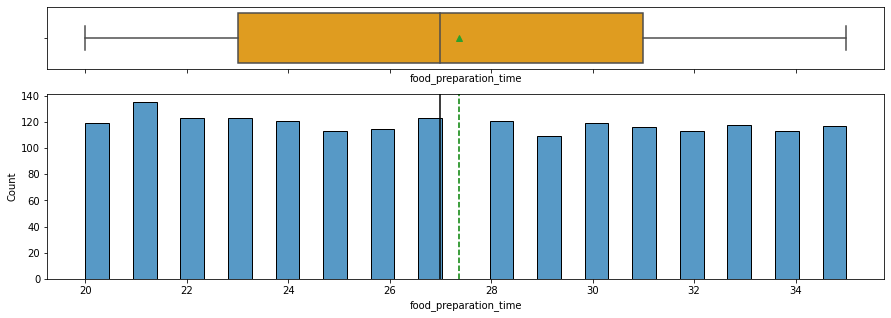

In [34]:
histobox(df,'food_preparation_time',bins=32) #using 2x the bins for visual clarity.

#### Observations:
    This distribution is the closest to having no skew (aside from order id). It is still right skewed, meaning there
    are higher amounts of low food prep time, but there are some unusually high prep times as well.
    
    There isn't too much else to examine here, other than most of these numerical analyses seem to be right skewed
    (which I would expect, since most of them have to do with spending and time, most prefer lower cost and less
    time but there are outliers). Also, the mean seems to be over a time that isn't tracked at all.

# delivery_time Univariate Analysis!!!

In [35]:
len(df['delivery_time'].value_counts())

19

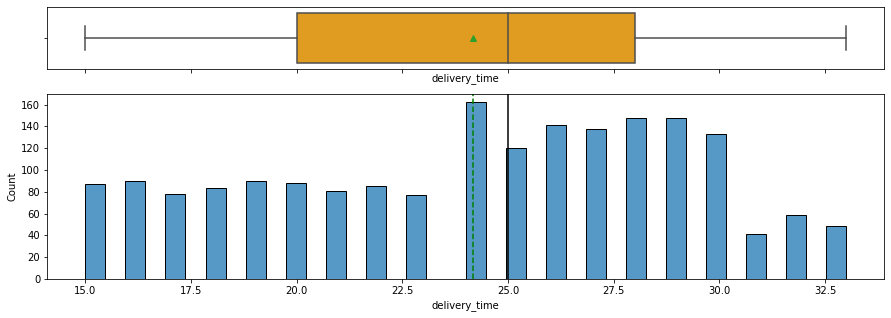

In [36]:
histobox(df,'delivery_time',bins=38)

#### Observations:
    The only left-skewed distribution! There are some examples of exemplary delivery time, but the high amount of deliveries
    between 23 minutes and 30 minutes create a median higher than the mean.
    
    Depending on whether FoodHub considers this delivery time range to be "late", this may be an issue worth investigating.

# OVERALL Question 6 Univariate Observations:
    For the most part, food/delivery costs tend low, food prep time tends short, and delivery time tends to be 20 minutes
    to 28 minutes. Anything shorter or longer is out of the ordinary/outside of Q1 & Q3. However, there are a lot of
    orders that take 28 - 30 minutes to deliver, which is odd since it's beyond Q3.
    
    Around 27% of the customers buy half of the food.
    The remaining 73% (or 866) customers ordered ~948 times from FoodHub, meaning beyond the top 27% orderers' mark, most
    people only place one or two orders. Around half of the orders are generated from people trying FoodHub once or twice
    and the other half is generated by frequent spenders.
    
    Many customers refuse to review the delivery/food, which may lead to inaccurate aggregates (Did they refuse to rate
    because the food was good and they were lazy? Or was the food so bad they uninstalled the app and never bothered?).
    This may be resolved by a rewards program to incentivize honest feedback.
    
    Weekends are hotspots for business. Weekdays are 1/7 as busy.
    
    Restaurant name and Cuisine type are fairly heavily weighted in favor of a few names and types. There are 50
    restaurants with only 1 order.
    
    Order id is not exactly good data to analyze, but it is interesting to note no order id's are missing.
    This probably means cancelled orders are not given an order id, as if they were, there would have been gaps
    in the distribution.
    
    More observations I made can be found under each individual category above.
    
---

In [37]:
print('\U0001f600')

😀


# **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [38]:
Restaurant= df['restaurant_name'].value_counts().reset_index()
Restaurant.columns=(['restaurantname','orders'])
print(Restaurant.head())

#reusing some of my code from Question 6.

del Restaurant

              restaurantname  orders
0                Shake Shack     219
1          The Meatball Shop     132
2          Blue Ribbon Sushi     119
3  Blue Ribbon Fried Chicken      96
4                       Parm      68


#### Observations:
    The top 5 restaurants in terms of order numbers are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon
    Fried Chicken, and Parm.

In [39]:
print('\U0001f600')

😀


# **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [40]:
A=df.groupby(['cuisine_type'])['day_of_the_week'].value_counts().reset_index()
A.columns=['WeekendCuisine','Day','Count']
print('\nThe old table: \n\n',A.sort_values("Count",ascending=False),'\n\n')

x=27

#I tend to use x= 'some constant' in loops a lot because I run into trouble with for-in drop loops.

    #I believe it's because when looping, I prefer to drop rows by their index numbers, and if you
    #drop rows while also using their placement inside as reference, the index will change constantly in the loop,
    #creating errors. That's my theory anyways, I've never gotten a drop loop to work by just using a for-in
    #loop contained in the dataframe.
    
    #I go backwards with this drop loop specifically for that reason. The index will change, but my x is decreasing,
    #so the lower numbers will never be affected and their indexes will always be the same as it loops.

while x>=0:
    if A['Day'][x]=='Weekday':
        A.drop(A.index[x],axis=0,inplace=True)
        x=x-1
    else:
        x=x-1
print('The new table, with Weekdays removed: \n')
A.sort_values("Count",ascending=False)
#process of creating a dataframe containing only weekend days sorted by top weekend cuisine.


The old table: 

     WeekendCuisine      Day  Count
0         American  Weekend    415
10        Japanese  Weekend    335
8          Italian  Weekend    207
1         American  Weekday    169
2          Chinese  Weekend    163
11        Japanese  Weekday    135
9          Italian  Weekday     91
16         Mexican  Weekend     53
3          Chinese  Weekday     52
6           Indian  Weekend     49
18  Middle Eastern  Weekend     32
14   Mediterranean  Weekend     32
7           Indian  Weekday     24
17         Mexican  Weekday     24
19  Middle Eastern  Weekday     17
24            Thai  Weekend     15
15   Mediterranean  Weekday     14
4           French  Weekend     13
12          Korean  Weekend     11
20        Southern  Weekend     11
22         Spanish  Weekend     11
21        Southern  Weekday      6
5           French  Weekday      5
25            Thai  Weekday      4
26      Vietnamese  Weekend      4
27      Vietnamese  Weekday      3
13          Korean  Weekday      2
2

,WeekendCuisine,Day,Count
0,American,Weekend,415
10,Japanese,Weekend,335
8,Italian,Weekend,207
2,Chinese,Weekend,163
16,Mexican,Weekend,53
6,Indian,Weekend,49
14,Mediterranean,Weekend,32
18,Middle Eastern,Weekend,32
24,Thai,Weekend,15
4,French,Weekend,13


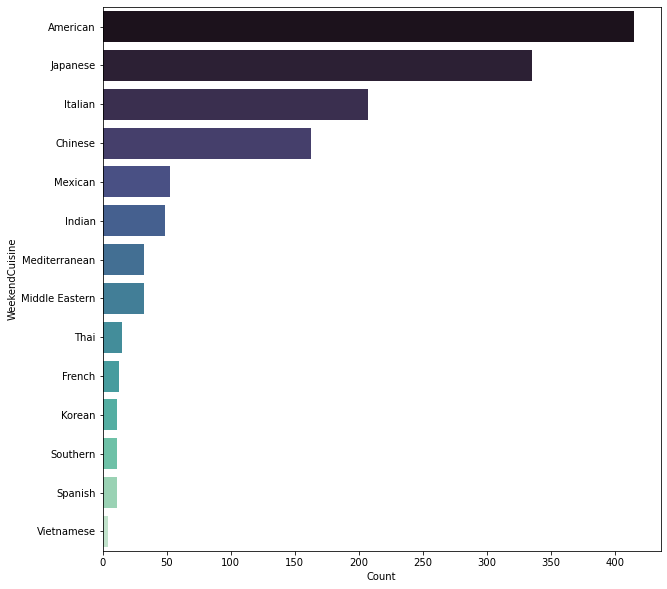

In [41]:
#plotting the above data:
sns.barplot(data=A,x='Count',y='WeekendCuisine',palette='mako',order=A.sort_values("Count",ascending=False).WeekendCuisine)
plt.gcf().set_size_inches(10,10)

del A

#### Observations:
    It is close, but American cusine beats out Japanese. It doesn't look too much different than that countplot we did in
    Question 6.

In [42]:
print('\U0001f600')

😀


# **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [43]:
#This time, I'm just using x to count. I can for-in within this loop because I'm not dropping rows.
x=0
for entry in df['cost_of_the_order']:
    if entry >20:
        x=x+1
print('{}% of the orders cost more than $20.'.format(round(x/1898*100,2)))
del x

29.24% of the orders cost more than $20.


#### Observations:
    As stated previously in my observations of question 6, there is a decent amount of orders above $25, which
    is at least part of what's causing the skew in the distribution of 'cost_of_the_order'. The other part causing
    the skew is almost certainly the low mode.

In [44]:
print('\U0001f600')

😀


# **Question 10**: What is the mean order delivery time? [1 mark]

In [45]:
round(df['delivery_time'].mean(),2)

24.16

#### Observations:
    The mean order delivery time is 24.16 minutes. Something of interest is that the mean happens to be closer to the
    mode of 'delivery_time' than the median.

In [46]:
round(df['delivery_time'].median(),2)

25.0

In [47]:
round(df['delivery_time'].mode()[0],2)

24

In [48]:
print('\U0001f600')

😀


# **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [49]:
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
    The highest 5 customer_id's and their order counts are:
    customer_id 52832 with 13 orders
    customer_id 47440 with 10 orders
    customer_id 83287 with 9 orders
    customer_id 250494 with 8 orders
    customer_id 259341 with 7 orders
    

In [50]:
print('\U0001f600')

😀


# Multivariate Analysis

# **Question 12**:
## Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


---

In [51]:
#pulling some stuff from the future here...

df['totaltime']=df['delivery_time']+df['food_preparation_time']
#I want to include total time as a column for this analysis as well, there may be correlations that aren't seen just
#looking at the two times individually.

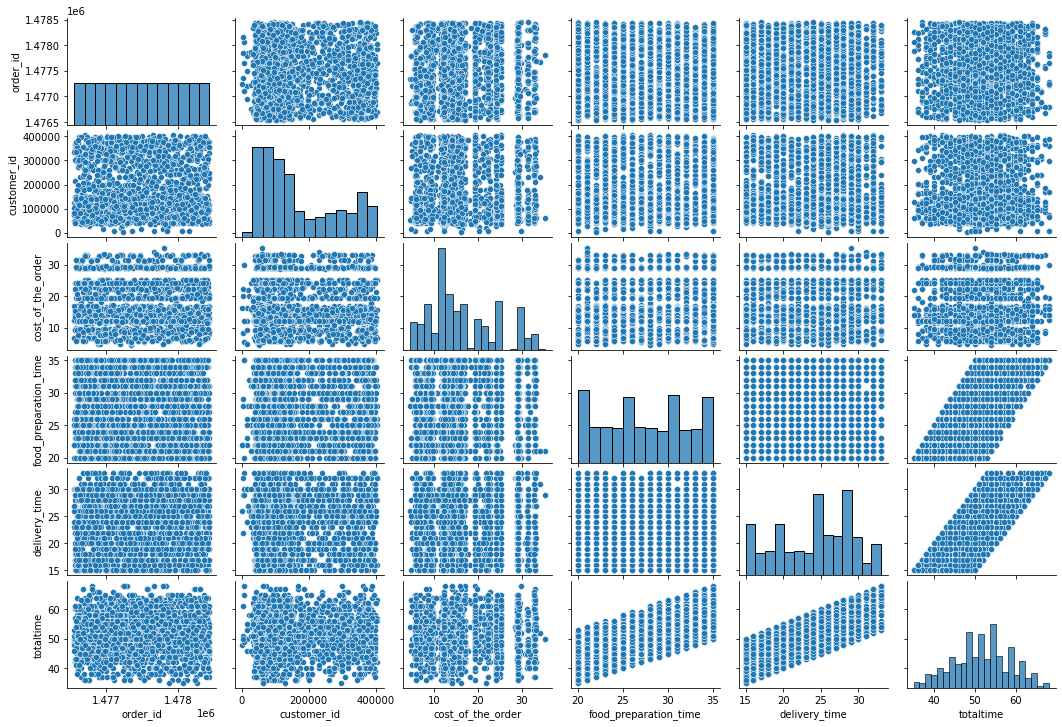

In [52]:
sns.pairplot(df)
plt.gcf().set_size_inches(15,10)

#pretty much all of the pairplot is useless... I was personally hoping for better visual relationships between the
#cost and food prep time/delivery time.

#food prep time & delivery time having linear relationship with total time should be ignored, since I created that column
#from both of their values.

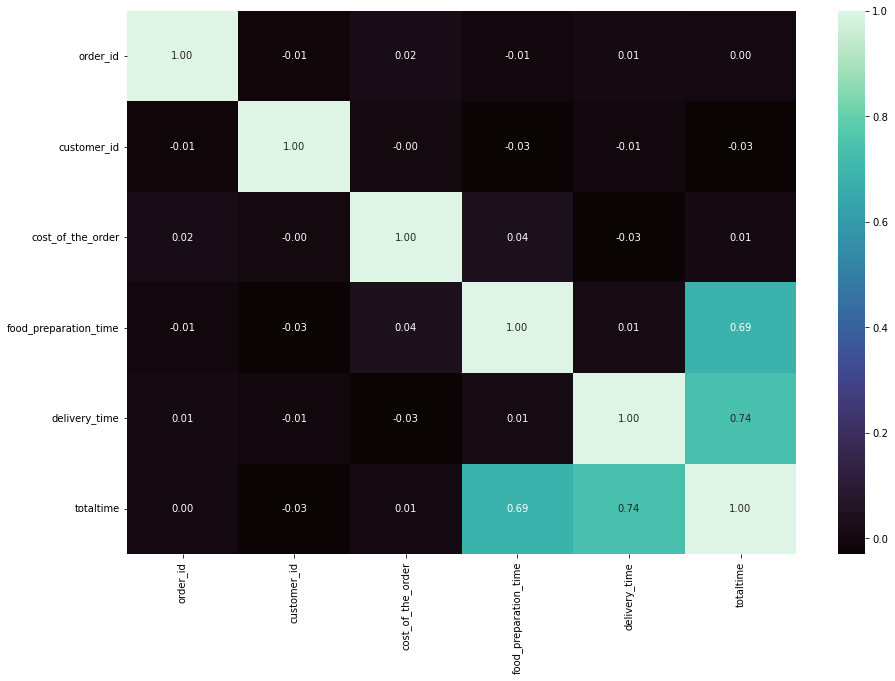

In [53]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap="mako")
plt.gcf().set_size_inches(15,10)

#yeah, pretty much zero correlation between the numerical values. If we're talking relative correlation, cost of order and
#food prep is the highest, so I got my wish sort of?

#customer_id having nearly the highest correlation in the heatmap with food prep time is hilarious to me. It means nothing
#though and should be ignored, since the idea of higher customer id guaranteeing you a longer wait time is just silly.

#### Observations for Numerical Multivariate Analysis:
    This is not a great start. Almost zero correlation between the variables and the scatterplots look like squares.
    
    Again, just ignore totaltime's correlation with its two parent data columns. I will use totaltime later.
    
    The best we can do is move on to the categorical data and see if there is anything there.

## The most obvious relationship to check first is restaurant_name with cost of order.
    i will pretty much be ignoring order_id and customer_id here, as those are effectively randomly assigned and
    an increase or decrease in either should have zero real effect on any other variables.

# We are starting with *restaurant_name and cost.*

In [54]:
#first thing to do is to only take the head and tail so we don't end up with a 4 page long plot,
#similar to how I did it in Question 6.

#However, I want the full cost data, rather than just the mean, so this will be slightly different.
#start by creating a few new dataframes, one for mapping the correct order and a copy to keep the order column in.

Ressy=df.copy()

sort_Ressy = pd.DataFrame(Ressy.groupby(['restaurant_name'])['cost_of_the_order'].mean().reset_index().sort_values(
    'cost_of_the_order',ascending=False).restaurant_name).reset_index().drop('index',axis=1).reset_index().set_index(
    ['restaurant_name'])
#the above code sorts the restaurant_names in order of highest mean cost to lowest, and puts them into a dataframe of
#its own. It then resets the index, drops the random numbers the index brought over, resets the index again to make
#an ordered list from 0 thru 177, then sets 'restaurant_name' as the index.

#This was all done so we could create a new column in Ressy to map the values 0 thru 177 to each corresponding
#restaurant name.

sort_Ressy

#To help visualize what I've done so far, I'm printing the dataframe.

,index
restaurant_name,
Kambi Ramen House,0
Emporio,1
Bhatti Indian Grill,2
Haru Gramercy Park,3
Lucky Strike,4
...,...
Market Table,173
Wa Jeal,174
Cipriani Le Specialita,175


In [55]:
#next, I am adding a 'temp' column to the dataframe made up with the mapped index values, 0 thru 177 being mapped
#to each restaurant name based on their mean cost of order. 0 is highest mean cost, 177 is lowest cost.

Ressy['temp']=Ressy['restaurant_name'].map(sort_Ressy['index'])
Ressy['temp']=Ressy['temp'].astype('int')
Ressy=Ressy.sort_values(['temp'],ascending=True)

#now that the data is sorted correctly, I will drop that temp column as it is pointless to keep it.

Ressy=Ressy.drop('temp',axis=1)

#now we have to make it so that it only plots the head and tail. I'm making the head a little bigger because 
#there isn't much interesting variation in the data at just head(5).

RessyPlot=pd.concat([Ressy.head(15),Ressy.tail()],axis=0)
RessyPlot['restaurant_name']=RessyPlot['restaurant_name'].cat.remove_unused_categories()

#see below. Kambi Ramen house has the highest cost of order mean, as it only has one entry which happens to be higher
#than every other restaurant's mean.

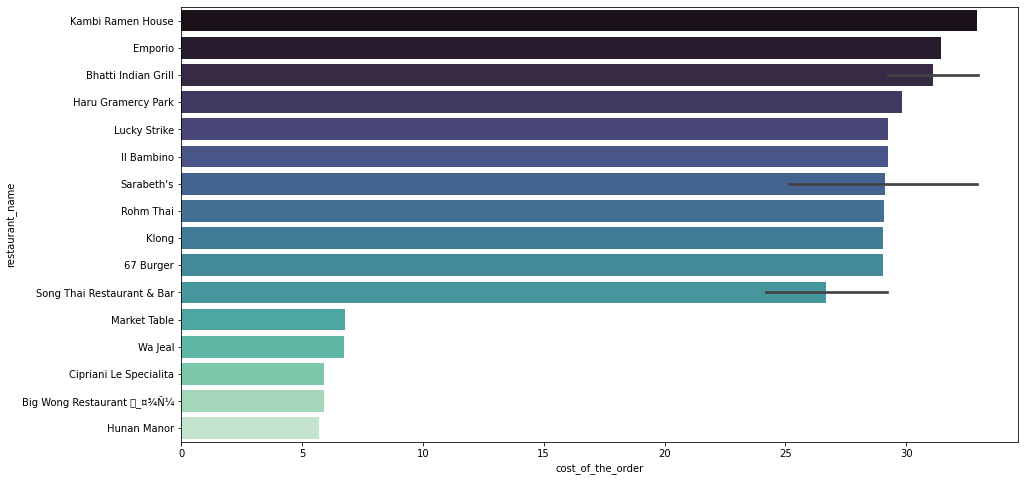

In [56]:
sns.barplot(data=RessyPlot,x='cost_of_the_order',y='restaurant_name',palette='mako',order=(
    RessyPlot['restaurant_name'].unique().tolist())) #made a list of only the unique values of restaurant_name to reorder it
plt.gcf().set_size_inches(15,8)

del Ressy
del RessyPlot
del sort_Ressy

#### Observations:
    Something to note is that Kambi Ramen House, Emporio, and others only have one entry, so their mean cost ends up being
    much higher as a result of their only order being a high cost one.
    
    Perhaps because of the high amount of single-order restaurants, this is not the best way to analyze the data.

### What this has done, however, is inform me that there are a lot of indian and asian cusine that appears higher up on the list. I want to check cuisine type next, using the exact same code.

# *Cuisine_type and Cost*

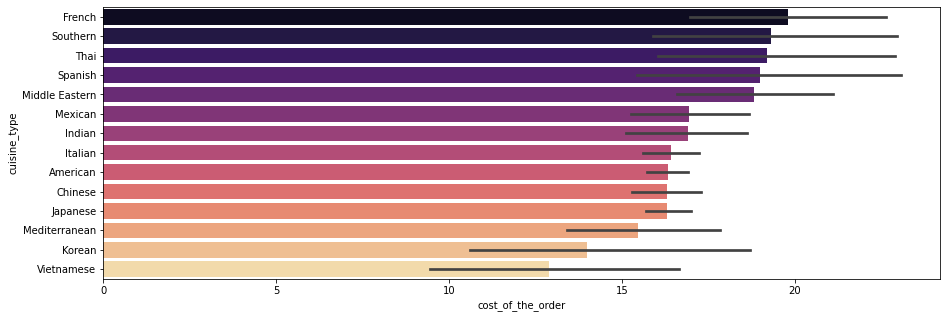

In [57]:
#same code, but with cuisine instead. I also don't break it up into head and tail because there's only 14 cat's.
Cuisine=df.copy()
sort_Cuisine = pd.DataFrame(Cuisine.groupby(['cuisine_type'])['cost_of_the_order'].mean().reset_index().sort_values(
    'cost_of_the_order',ascending=False).cuisine_type).reset_index().drop('index',axis=1).reset_index().set_index(
    ['cuisine_type']).reset_index().set_index('cuisine_type')
Cuisine['temp']=Cuisine['cuisine_type'].map(sort_Cuisine['index'])
Cuisine['temp']=Cuisine['temp'].astype('int')
Cuisine=Cuisine.sort_values(['temp'],ascending=True)
sns.barplot(data=Cuisine,x='cost_of_the_order',y='cuisine_type',palette='magma',order=(
Cuisine['cuisine_type'].unique().tolist()))
plt.gcf().set_size_inches(15,5)
del Cuisine
del sort_Cuisine

#### Observations cont'd:
    Surprisingly, French appears to be the de facto expensive food.
    Southern food gets as expensive as French on the high end, and Thai,
    Middle Eastern and Spanish are not too far behind.
    
    I want to also check the maximum costs for Cuisine_type.

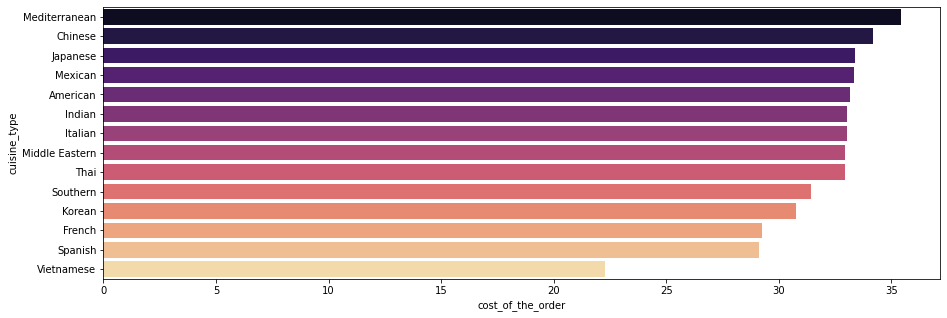

In [58]:
Max=df.groupby(['cuisine_type'])['cost_of_the_order'].max().reset_index().sort_values('cost_of_the_order',ascending=False)
sns.barplot(data=Max,x='cost_of_the_order',y='cuisine_type',palette='magma',order=(
Max['cuisine_type'].unique().tolist()))
plt.gcf().set_size_inches(15,5)
del Max

#### Observations cont'd again
    WOW! French is in 3rd-to-last place! So, as it turns out, French food averages higher, but is nowhere near the most
    expensive food if you're talking highest cost orders placed. To me, that says even buying a small amount of French
    food will cost you a ton. These other, much higher-cost orders are probably bulk orders for parties or
    extended families.
    
    Vietnamese is the most consistent, they cost the least on average and when sorted by maximum value.
    
    We can also see more of the Chinese, Indian, and Mediterranean places we saw when plotting by restaurant_name,
    as well as some American food from that restaurant plot like 67 Burger.

### Let's move on before coming to any concrete conclusions.

### I'm curious to see if cost_of_the_order has any effect on the rating.

---

# Moving on to *cost_of_the_order & rating*.

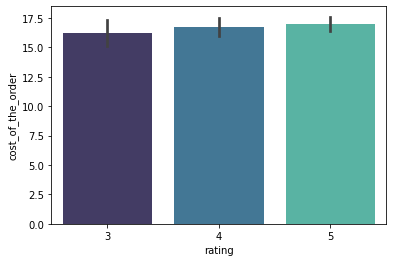

In [59]:
#borrowing some code from the next question, I'm dropping not given ratings and changing rating to category.

dfRate=df.drop(df[df['rating']=='Not given'].index)
dfRate['rating']=dfRate['rating'].astype('category')
dfRate['rating']=dfRate['rating'].cat.remove_unused_categories()


sns.barplot(data=dfRate,x='rating',y='cost_of_the_order',palette='mako');
del dfRate

#### Observations:
    Very simple plot, but it does seem to show a very slight trend.
    5 star meals tend to be a tiny bit more expensive.

# Same thing, but with *delivery time & rating*.

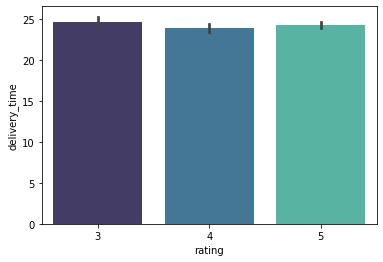

In [60]:
dfRate=df.drop(df[df['rating']=='Not given'].index)
dfRate['rating']=dfRate['rating'].astype('category')
dfRate['rating']=dfRate['rating'].cat.remove_unused_categories()


sns.barplot(data=dfRate,x='rating',y='delivery_time',palette='mako');
del dfRate

#### Observations:
    There is even less of a pattern here. I'm very surprised though, I expected 5 star ratings to come from quicker orders.

# While we're at it though, how about we *redo the .corr heatmap with rating as a numerical?*

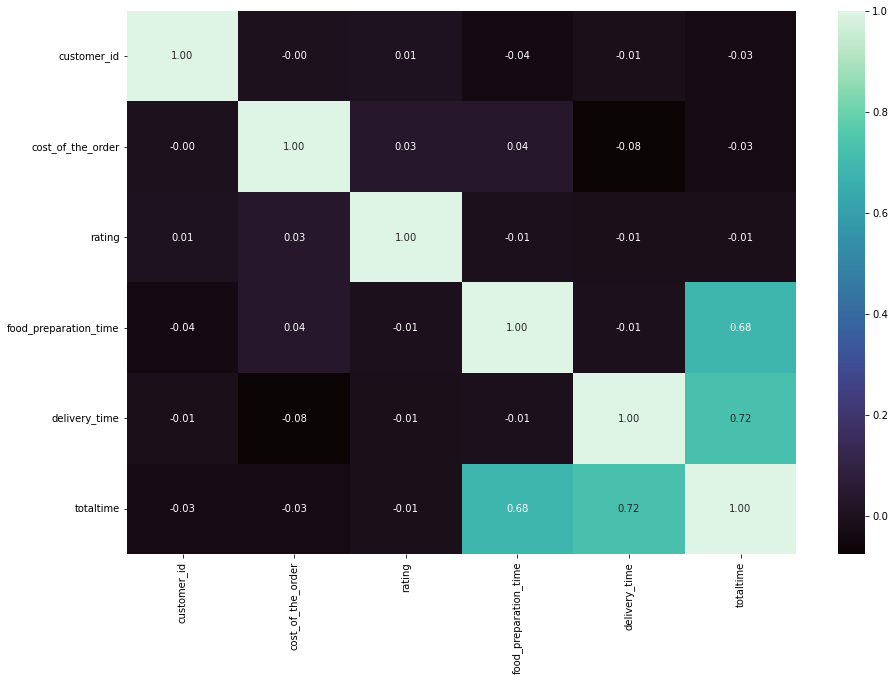

In [61]:
dfRate=df.drop(df[df['rating']=='Not given'].index)
dfRate['rating']=pd.to_numeric(dfRate['rating'])

sns.heatmap(dfRate.drop(['order_id'],axis=1).corr(),annot=True,fmt='0.2f',cmap="mako")
plt.gcf().set_size_inches(15,10)

#### Observations:
    There isn't a very high correlation between rating and any other data. It's not likely then that a higher cost
    leads to better food.
    
    Ignore the delivery time/cost negative correlation, the heatmap with more data points had a much lower correlation
    between those two.
    
    It's very likely there is little to zero correlation between any numerical data points here (including ratings).
    
---

# I am kind of curious to see what *cuisine types get the best ratings.*

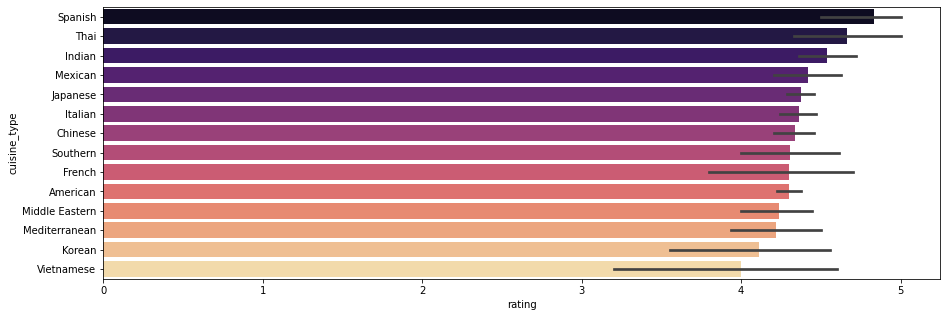

In [62]:
CuisineRate=dfRate.copy()
sort_CuisineRate = pd.DataFrame(CuisineRate.groupby(['cuisine_type'])['rating'].mean().reset_index().sort_values(
    'rating',ascending=False).cuisine_type).reset_index().drop('index',axis=1).reset_index().set_index(
    ['cuisine_type']).reset_index().set_index('cuisine_type')
CuisineRate['temp']=CuisineRate['cuisine_type'].map(sort_CuisineRate['index'])
CuisineRate['temp']=CuisineRate['temp'].astype('int')
CuisineRate=CuisineRate.sort_values(['temp'],ascending=True)
sns.barplot(data=CuisineRate,x='rating',y='cuisine_type',palette='magma',order=(
CuisineRate['cuisine_type'].unique().tolist()))
plt.gcf().set_size_inches(15,5)
del CuisineRate
del sort_CuisineRate

#### Observations:
    Vietnamese tends to be rated lower than other food types, but some Vietnamese food is rated 5 star.
    Spanish is the highest by a large margin.
    
    See below, there are no foods without a 5 star rating.

In [63]:
dfRate.groupby(['cuisine_type'])['rating'].max().reset_index().sort_values('rating',ascending=False)

,cuisine_type,rating
0,American,5
1,Chinese,5
2,French,5
3,Indian,5
4,Italian,5
5,Japanese,5
6,Korean,5
7,Mediterranean,5
8,Mexican,5
9,Middle Eastern,5


# Next, I want to go over *cuisine_type, day_of_the_week & totaltime*.

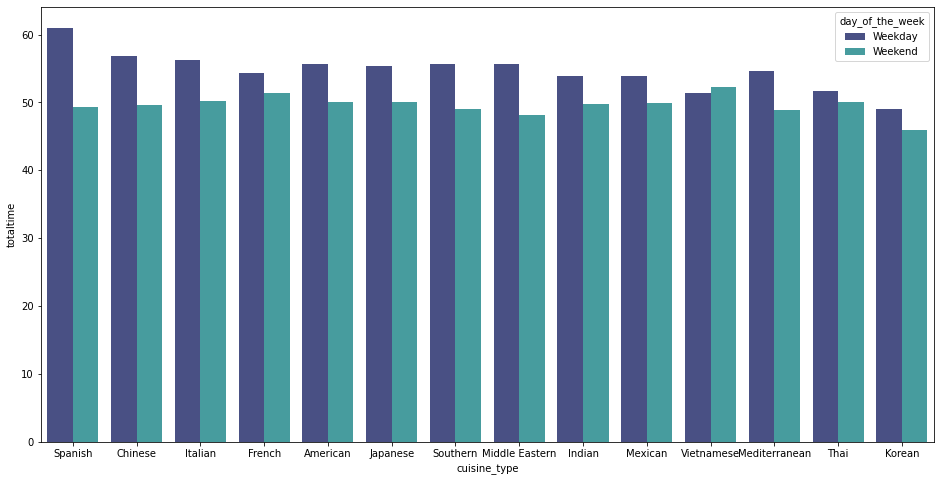

In [64]:
#first, do a groupby of day_of_the_week, cuisine_type, and totaltime.
DayWeekTime=df.groupby(['cuisine_type','day_of_the_week'])['totaltime'].mean().reset_index()

#create a list for the barplot order. I am going by the mean totaltime value for each cuisine type.
order=DayWeekTime.groupby(['cuisine_type']).mean().reset_index().sort_values('totaltime',ascending=False).cuisine_type.tolist()

#barplot
sns.barplot(data=DayWeekTime,x='cuisine_type',y='totaltime',hue='day_of_the_week',palette='mako',order=order)
plt.gcf().set_size_inches(16,8)
del DayWeekTime
del order

#### Observations:
    Something interesting to note here, Vietnamese is the only food that takes longer to deliver on the weekend. They are
    also the longest delivery time on the weekend, and the second shortest delivery time on the weekdays. Very strange 
    combination!
    
    Spanish has very high variability between Weekend and Weekday delivery times.
    
    Korean has the lowest average delivery time.

# A very quick aside here, small bargraph for *day_of_the_week & totaltime*.

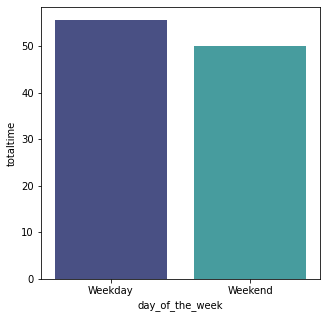

In [65]:
DayTime=df.groupby(['day_of_the_week'])['totaltime'].mean().reset_index()
sns.barplot(data=DayTime,x='day_of_the_week',y='totaltime',palette='mako')
plt.gcf().set_size_inches(5,5)

#### Observations:
    As can be seen in the previous observation, Weekdays are longer to deliver than Weekends. I still hold this is
    because of rush hour traffic.
    
# One more totaltime bargraph. *Rating & totaltime*.

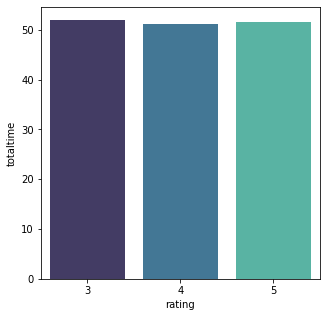

In [66]:
DayTime=dfRate.groupby(['rating'])['totaltime'].mean().reset_index()
sns.barplot(data=DayTime,x='rating',y='totaltime',palette='mako')
plt.gcf().set_size_inches(5,5)
del DayTime

#### Observations:
    Rating as a categorical seems to be unaffected by cost or time. Again, I find this very interesting, as I would
    expect a higher rating on orders that get delivered promptly.

# Overall, cuisine_type seems to be the best categorical variable for multivariate analysis.

### restaurant_name has too many single-order locations for average data to mean anything about those specific restaurants. And when single order restaurants coat the top and bottom of the rankings, it's hard to make any real conclusions about which restaurants are *really* the highest rated, highest costing, etc.
    Question 13 probably has the most useful multivariate data analysis we can provide with
    restaurant_name. It essentially forces us to ignore the restaurants with low amounts of orders.

### rating has very little to do with cost or time, and it really only shows meaningful observations when paired with cuisine_type as a numerical.

### While it's clear weekdays have longer delivery times than weekends, this really only builds on the data we already knew from univariate day_of_the_week. Delivery times are longer, so less food gets delivered, or at least that's part of the issue.

### And as previously stated, there is extremely low correlation between any of the numerical columns, to the point where the jointplot looks like a bunch of squares.
---
# The last thing I want to do is analyze which cuisine_type is the 'best' on foodhub.

In [67]:
#To do this,I am going to take rankings made between cuisine type and other numericals and assign them values.

#cuisine_type & cost
#cuisine_type & rating (numerical)
#cuisine_type & totaltime

dfRate=dfRate.groupby('cuisine_type').mean().reset_index()
dfRate['totaltime']=dfRate['food_preparation_time']+dfRate['delivery_time']
dfRateCuisine=dfRate.drop(['order_id','customer_id','food_preparation_time','delivery_time'],axis=1)

#next, I will sort by each of the 3 numerical columns and record the order of the cuisine_types into a list.
#I ended with sort_values('cuisine_type') so they could be merged together in the 3rd section of code below.
Cuisine_cost=dfRateCuisine.sort_values(['cost_of_the_order'],ascending=False).cuisine_type.reset_index().drop(
    ['index'],axis=1).reset_index().set_index('cuisine_type').sort_values('cuisine_type',ascending=True)

Cuisine_rate=dfRateCuisine.sort_values(['rating'],ascending=True).cuisine_type.reset_index().drop(
    ['index'],axis=1).reset_index().set_index('cuisine_type').sort_values('cuisine_type',ascending=True)

Cuisine_time=dfRateCuisine.sort_values(['totaltime'],ascending=False).cuisine_type.reset_index().drop(
    ['index'],axis=1).reset_index().set_index('cuisine_type').sort_values('cuisine_type',ascending=True)

#finally, merge all of these 3 columns onto the RateCuisine dataframe.

dfRateCuisine=pd.merge(Cuisine_cost,(pd.merge(
    Cuisine_rate,Cuisine_time,how='outer',on='cuisine_type')),how='outer',on='cuisine_type')
dfRateCuisine.columns=['Cost','Rating','Time']
dfRateCuisine

,Cost,Rating,Time
cuisine_type,,,
American,6,4,1
Chinese,10,7,3
French,0,5,2
Indian,7,11,11
Italian,5,8,0
Japanese,8,9,5
Korean,12,1,13
Mediterranean,11,2,7
Mexican,9,10,8


# To understand what I'm making, look at the dataframe above.
    These are the rankings of each of the 3 most important numerical columns, cost, rating, and time.

## The highest score per column is 13, the lowest is 0.
    Points are distributed based on ranking (ie: Korean food was prepared & delivered the fastest, so they get 13
    points. French food was the most expensive, so they scored 0 in cost.)

In [68]:
dfRateCuisine['AggregateScore']=(dfRateCuisine['Cost']+dfRateCuisine['Rating']+dfRateCuisine['Time'])/3
dfRateCuisine1=dfRateCuisine.sort_values('AggregateScore',ascending=False)
dfRateCuisine1
#below is the list, in order, of the cuisine types that scored the 'best' overall, when considering quick delivery, low cost,
#and high rating.

,Cost,Rating,Time,AggregateScore
cuisine_type,,,,
Indian,7,11,11,9.67
Mexican,9,10,8,9.00
Spanish,2,13,12,9.00
Korean,12,1,13,8.67
Thai,3,12,9,8.00
Japanese,8,9,5,7.33
Chinese,10,7,3,6.67
Mediterranean,11,2,7,6.67
Southern,4,6,10,6.67


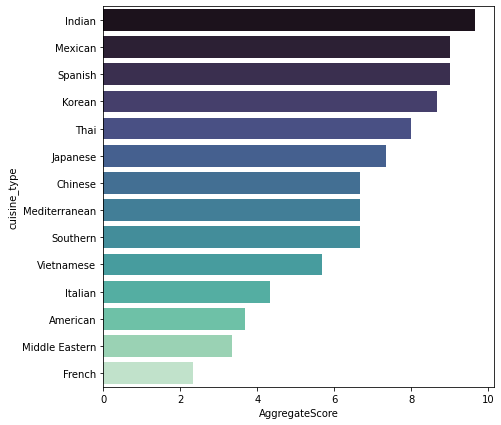

In [69]:
#A simple plot of the same data, AggregateScore being the x value.
sns.barplot(data=dfRateCuisine1,y=dfRateCuisine1.index,x='AggregateScore',palette='mako',order=dfRateCuisine1.index)
plt.gcf().set_size_inches(7,7)

#### Observations:
    The AggregateScore doesn't have to be the end-all/be-all score for best cuisine_type.
    
    If you prefer lower cost, Cost having a higher rating will have a higher weight for you. If you prefer cuisine that 
    is all around good, look for the cuisine with 3 good scores, rather than 2 phenomenal scores and one bad one like
    Korean food or Spanish food.
    
    If you just want to buy the most expensive food regardless of quality or delivery time to flex on your friends,
    buy French.
    
---
    

# Final thoughts on *multivariate analysis*:
    The data for higher cost and higher rated restaurants isn't necessarily accurate, as the 50 restaurants that only
    have 1 order make sorted barplots inaccurate. Some restaurants that only have one order also have the highest mean
    cost (like Kambi Ramen House), but that could have been one giant family sized order, it could have been a bowl of
    ramen, we simply don't have the information necessary to make an informed guess upon these single order restaurants'
    quality or cost.
    
    French food appears to be the most costly on average, but also not well rated. They also appear to have one of
    the worst average order/delivery times.
    
    Vietnamese food is both the cheapest and lowest rated.
    
    Korean Food is one of the cheapest options, and has one of the fastest average order/delivery times, but is only 1 
    placement above Vietnamese food in ratings.
    
    Higher cost of order seems to have a very, very small positive effect on quality of food. However, the data for
    rating and cost are not correlated when using a heatmap, so this could come down to a small sample size due to
    ratings not given.
    
    The weekends have faster deliveries and more orders. Weekdays are most likely less busy and with slower deliveries
    because of rush hour.
    
    Overall, Indian food places as the best in terms of cost, Rating, and Time.
    French places the worst, having a middle tier rating, but nearly the worst order/delivery times and THE highest average
    cost.
    
    If I were to choose any cuisine type to eat based on my findings, I would probably choose Mexican, as it has
    not a single rating below 8. Highly rated, cheap, and relatively quick delivery.
    
---

In [70]:
del dfRate
del dfRateCuisine
del Cuisine_cost
del Cuisine_rate
del Cuisine_time

del df['totaltime']
#get rid of this column for now, we'll see it again later.

In [71]:
print('\U0001f643')

🙃


# **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [72]:
#First, I will find the sum of the ratings for each restaurant.
#begin by dropping all 'Not given' ratings from the dataframe.

dfRate=df.drop(df[df['rating']=='Not given'].index)

#change the rating column into 'category' type. This is so we can use groupby with value_counts.
dfRate['rating']=dfRate['rating'].astype('category')
dfRate['rating']=dfRate['rating'].cat.remove_unused_categories() #remove the not given cat.

In [73]:
#next, a series of groupby's to sum the rating counts, then sort it by those counts.

#a groupby to establish the value_counts as its own column.
dfTotalRate=dfRate.groupby(['restaurant_name'])['rating'].value_counts().reset_index()

#relabel the columns for easy reference
dfTotalRate.columns=['restaurantname','level','count']

#a second groupby to group the restaurant name with the new count column (& sort by count).
#then print the head to see how many restaurants have over 50 Total Ratings.
dfTotalRate=dfTotalRate.groupby(['restaurantname'])['count'].sum().reset_index().sort_values('count',ascending=False)
print(dfTotalRate.head())

#only the top 4 restaurants on this list apply to the 50 ratings requirement,
#Shake Shack, Meatball Shop, Blue Ribbon Sushi and Fried Chicken.
del dfTotalRate

                restaurantname  count
136                Shake Shack    133
153          The Meatball Shop     84
21           Blue Ribbon Sushi     73
20   Blue Ribbon Fried Chicken     64
121           RedFarm Broadway     41


In [74]:
#change rating to a numeric so we can average the values, then check all 4 restaurant's rating averages separately.
dfRate['rating']=pd.to_numeric(dfRate['rating'])

#groupby with the mean on rating and restaurant name,
#then print each of the 4 restaurants from the previous code's output.
dfRate=dfRate.groupby(['restaurant_name'])['rating'].mean().reset_index()
print(dfRate[dfRate['restaurant_name']=='Shake Shack'],'\n')
print(dfRate[dfRate['restaurant_name']=='The Meatball Shop'],'\n')
print(dfRate[dfRate['restaurant_name']=='Blue Ribbon Sushi'],'\n')
print(dfRate[dfRate['restaurant_name']=='Blue Ribbon Fried Chicken'],'\n')

#And all 4 top restaurants are also 4 star or above.

del dfRate

    restaurant_name  rating
136     Shake Shack    4.28 

       restaurant_name  rating
153  The Meatball Shop    4.51 

      restaurant_name  rating
21  Blue Ribbon Sushi    4.22 

              restaurant_name  rating
20  Blue Ribbon Fried Chicken    4.33 



#### Observations:
    Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken are all rated 50+ times, and have at
    least 4 star ratings on average.

In [75]:
print('\U0001f600')

😀


# **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [10]:
#set up a few temporary variables, use a for loop to total the revenue with if-else statements.

dfCost=df['cost_of_the_order']
totalrevenue=0
for entry in dfCost:
    if entry <=5:
        totalrevenue=totalrevenue
    elif 5 < entry <= 20: #USE ELIF FOR MULTIPLE IFS AND ELSE
        totalrevenue=totalrevenue+(0.15*entry)
    else: #MISTAKES WERE MADE HERE
        totalrevenue=totalrevenue+(0.25*entry)
print('${} in revenue generated from restaurant fees'.format(round(totalrevenue,2)))
del dfCost
del totalrevenue

$6166.3 in revenue generated from restaurant fees


#### Observations:
    The company makes a net $6176.99 off of the restaurant fees.

In [77]:
print("\U0001f614 that's pretty low...")

😔 that's pretty low...


# **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [78]:
#just add the two columns together and put it in a new one called total time.
df['totaltime']=df['delivery_time']+df['food_preparation_time']
df['totaltime'].dtype

dtype('int64')

In [79]:
#Do pretty much the same kind of loop as the last few problems, establish a zero then add to it whenever the requirement
#is satisfied.
df['totaltime'].sort_values(ascending=False)
x=0
for entry in df['totaltime']:
    if entry >60:
        x=x+1
print('Approximately {}% of food deliveries take more than 60 total minutes.'.format(round(x/1898*100,2)))
del df['totaltime']
#more simple for-loops.

Approximately 10.54% of food deliveries take more than 60 total minutes.


#### Observations:
    FoodHub takes above 60 minutes to deliver the food from time of order around 10.54% of the time.

In [80]:
print('\U0001f600')

😀


# **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [81]:
df.groupby(['day_of_the_week'])['delivery_time'].mean().reset_index()
#same groupbys ive done all day

,day_of_the_week,delivery_time
0,Weekday,28.34
1,Weekend,22.47


#### Observations:
    Strangely, weekdays are both less busy and with a higher delivery time. I would hazard a guess that it has something to do with rush hour traffic.

In [82]:
print("\U0001f634 i'm tired!")

😴 i'm tired!


### Conclusion and Recommendations

# **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

---


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB
None


,Cost,Rating,Time,AggregateScore
cuisine_type,,,,
Indian,7,11,11,9.67
Mexican,9,10,8,9.00
Spanish,2,13,12,9.00
Korean,12,1,13,8.67
Thai,3,12,9,8.00
Japanese,8,9,5,7.33
Chinese,10,7,3,6.67
Mediterranean,11,2,7,6.67
Southern,4,6,10,6.67


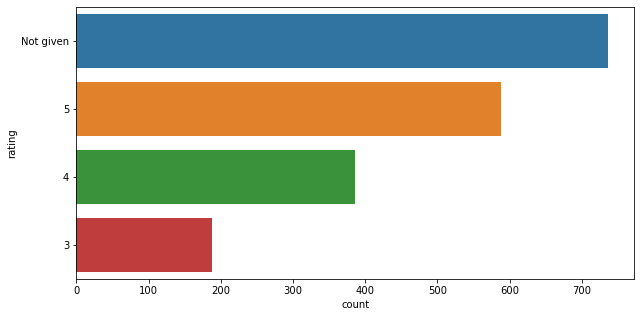

In [83]:
sns.countplot(data=df,y='rating',order=df['rating'].value_counts().index)
plt.gcf().set_size_inches(10,5)
print(df.info())
dfRateCuisine1

#### Conclusions:
    Probably one of the most notable things I found was that 27% of the customers place half of FoodHub's orders, and 
    the remaining half is made up of people that tried FoodHub once or twice. This is most likely the model they have
    built the business around, so there isn't much to recommend here. As long as they can continue getting a steady
    stream of new customers, they'll continue making money.
    
    No rating is the most frequent rating on the app. More on this in Recommendations.
    
    Weekdays are 1/7 as busy as weekend days, and weekdays also have slower deliveries. This is most likely due to rush
    hour, as well as the fact many FoodHub deliverers work full time elsewhere so there isn't much I can recommend to
    fix this.
    
    There are 50 restaurants with only 1 order. This isn't a problem really, in fact I'd say it's a good thing they are
    open to providing variety. However, coupled with the low percentage of orders that get rated, these restaurants are
    kind of in the dark in terms of quality of food or true costs for delivery.
    
    Finally, in my research and analysis, I found that the generally best cuisine_types are Indian, Mexican, and Spanish,
    all having an AggregateScore of 9 or above, and the worst are American, Middle Eastern, and French, all having below
    a 4 AggregateScore.
    
#### Recommendations:
    To fix the No Rating gap in the data, I would recommend the company provides an incentive for customers to rate
    their food AND delivery experiences separately. The easiest way to incentivize customers to do so is some sort of
    rewards system, maybe a points system (since raffles/sweepstakes are somewhat dead to the younger generation),
    where after 10 - 20 reviews you're given a coupon to your most ordered-from location. Separating delivery from
    food will also provide more insight to whether or not the restaurant/cuisine_type is bad, or the average delivery
    driver in the area is bad. The company can then make adjustments accordingly.
    
    My next recommendation would be to include all days of the week as separate subcategories of day_of_the_week. I
    saw a lot of potential examining Weekday and Weekend with order count and cost, but unfortunately without more
    specific data, all you can conclude is the obvious: it's more busy on the weekend. With more specific data, we
    would be able to see if Fridays are as busy as the weekends, or see whether the lull in deliveries starts Mondays
    or Tuesdays.
    
    Finally, I would recommend including a separate Order_Time category, or incorporating order time into the
    'day_of_the_week' column. It would be helpful to know what times of the day are the busiest on which days, and
    it would be especially helpful to know what popular restaurants are ordered from the most at heavy business hours.
    With that information, well-timed targeted advertisements and notifications could be sent out to the 27% of
    customers who frequently order, which would increase sales.

In [84]:
print('\U0001f607')

😇
